In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
# Create some data
np.random.seed(69)
x = 2 * np.random.rand(100,1)
y = 6 +3 * x+np.random.randn(100,1)

![Alt text](image.png)

m [0.17830573], b [0.17670323], loss [81.8027251] iteration 0
m [0.34944687], b [0.3466162], loss [75.62489612] iteration 1
m [0.51370565], b [0.51000554], loss [69.9232406] iteration 2
m [0.67135319], b [0.66712742], loss [64.66103757] iteration 3
m [0.82264996], b [0.81822793], loss [59.80439799] iteration 4
m [0.96784614], b [0.96354345], loss [55.32204632] iteration 5
m [1.10718213], b [1.10330111], loss [51.18511896] iteration 6
m [1.24088882], b [1.23771908], loss [47.36697828] iteration 7
m [1.36918805], b [1.36700694], loss [43.84304091] iteration 8
m [1.49229292], b [1.49136607], loss [40.59061934] iteration 9
m [1.61040815], b [1.61098988], loss [37.58877571] iteration 10
m [1.72373039], b [1.72606421], loss [34.81818689] iteration 11
m [1.83244859], b [1.83676758], loss [32.2610199] iteration 12
m [1.93674424], b [1.94327148], loss [29.90081707] iteration 13
m [2.03679169], b [2.04574066], loss [27.7223899] iteration 14
m [2.13275845], b [2.1443334], loss [25.71172123] itera

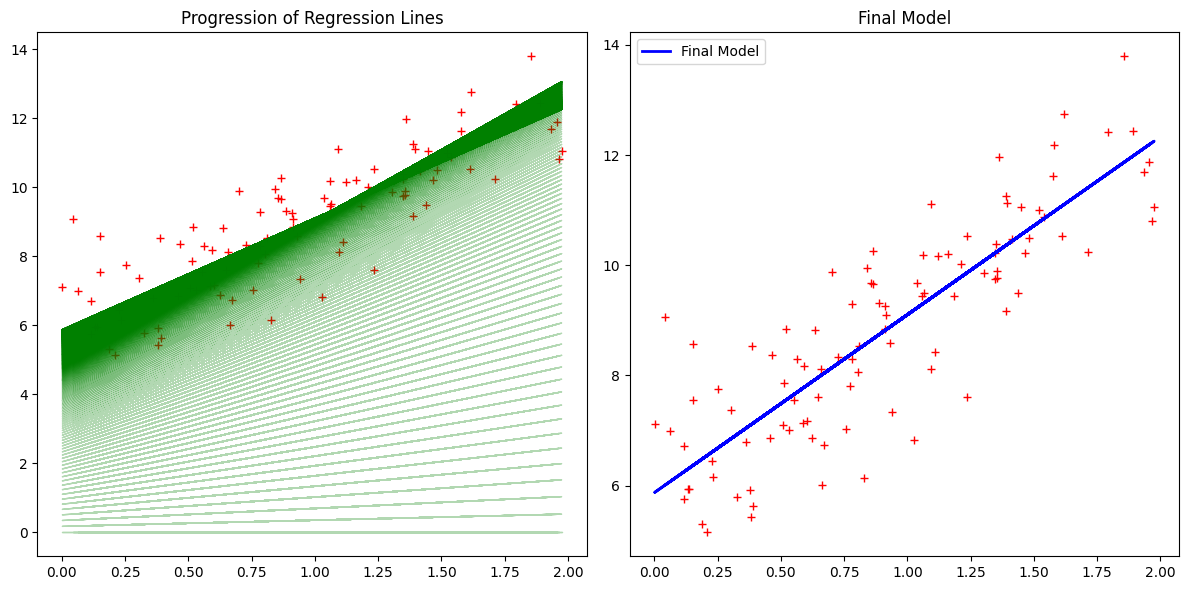

In [11]:
def gradient_descent1(x, y):
    # y = mx + b
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = 0.01

    # Lists to store intermediate y_predicted values, used for plotting
    y_predicted_list = []

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        y_predicted_list.append(y_predicted)
        L = (1/n) * sum([val**2 for val in (y - y_predicted)])
        md = -(2/n) * sum(x * (y - y_predicted))
        bd = -(2/n) * sum(y - y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
        print("m {}, b {}, loss {} iteration {}".format(m_curr, b_curr, L, i))

    # Plot the progression of regression lines during iterations
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(x, y, color='red', marker='+', linewidth=1)
    for i, y_predicted in enumerate(y_predicted_list):
        plt.plot(x, y_predicted, color='green', alpha=0.3, linewidth=1, label=f'Iteration {i}')
    plt.title('Progression of Regression Lines')

    # Plot the final regression line in its own plot
    plt.subplot(1, 2, 2)
    final_y_predicted = m_curr * x + b_curr
    plt.scatter(x, y, color='red', marker='+', linewidth=1)
    plt.plot(x, final_y_predicted, color='blue', label='Final Model', linewidth=2)
    plt.legend()
    plt.title('Final Model')

    plt.tight_layout()
    plt.show()


gradient_descent1(x, y)

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)
print(reg.coef_, reg.intercept_)

[[3.13540648]] [5.97223849]


In [13]:
def get_full_sample_matrix(samples):
    '''
    The code below transforms a sample matrix into the final X matrix
    with the additional ones at the start of each row.
    '''
    samples_matrix = samples.copy()
    if samples.ndim == 1:
        samples_matrix = samples_matrix.reshape(-1, 1)
        
    ones_vec = np.ones((samples_matrix.shape[0], 1), dtype=samples.dtype)
    return np.hstack([ones_vec, samples_matrix])

In [14]:
X = get_full_sample_matrix(x)

![Alt text](image-1.png)

![Alt text](image-2.png)

In [15]:
from numpy import linalg as LA
def gradient_descent2(X, y):
    m_curr = b_curr = 0
    iterations = 1000
    learning_rate = 0.01
    n = len(x)
    B = np.zeros((X.shape[1], 1))
    for i in range(iterations):
        errors = y - X.dot(B)
        L = 1/n * (LA.norm(errors))**2
        grad = -2/n * (X.T).dot(errors)
        B = B - learning_rate*grad
        print ("m {}, b {}, loss {} iteration {}".format(B[1][0],B[0][0],L, i))
    return B

In [16]:
gradient_descent2(X,y)

m 0.17830572609406556, b 0.17670323090703413, loss 81.80272509655315 iteration 0
m 0.34944686842988526, b 0.3466161969098722, loss 75.6248961222846 iteration 1
m 0.5137056505402126, b 0.5100055421764096, loss 69.92324059766248 iteration 2
m 0.6713531939937302, b 0.6671274240549182, loss 64.66103757043594 iteration 3
m 0.8226499550765529, b 0.8182279255533309, loss 59.80439799106741 iteration 4
m 0.9678461442975393, b 0.9635434515943092, loss 55.32204631715612 iteration 5
m 1.107182129393011, b 1.1033011096842478, loss 51.18511896047253 iteration 6
m 1.2408888224799044, b 1.237719075609269, loss 47.36697827770632 iteration 7
m 1.3691880519808501, b 1.3670069447471493, loss 43.84304090620055 iteration 8
m 1.4922929199201562, b 1.491366069560948, loss 40.59061933839025 iteration 9
m 1.610408145166103, b 1.610989883817865, loss 37.58877571397973 iteration 10
m 1.7237303931723322, b 1.726064214055464, loss 34.81818688763031 iteration 11
m 1.8324485927493686, b 1.8367675787968725, loss 32.26

array([[5.87093704],
       [3.23109338]])